In [103]:
from backend.core.analyse import Analyse
from backend.function.dataframes import convertToMagnet
import json
import matplotlib.pyplot as plt
import numpy as np

In [104]:
analyse = Analyse()
ble = open('./backend/json/Ble.json') # import des donné
ble = json.load(ble) # On converti les donné

In [105]:
df = convertToMagnet(ble) # Format du dataset
analyse.provideDataset(False, df)
B=analyse.getMagneticFieldNormal() # magnet normal
print("Le dataset: \n", df.head(3))
print("Les 3 premier element de la norme de B: ", B[-3])

Le dataset: 
      createdAtNs               magnet    initialTime     result  \
x  6266926915594       [0.12, 199.08]  6239985773844 -39366.797   
y  6266926915594  [-52.379997, 30.96]  6239985773844 -39366.797   
z  6266926915594     [199.08, -18.48]  6239985773844 -39366.797   

       coordinates       time  
x  [0.0, 0.0, 0.0]  26.941142  
y  [0.0, 0.0, 0.0]  26.941142  
z  [0.0, 0.0, 0.0]  26.941142  
Les 3 premier element de la norme de B:  1.7247094711863793e-07


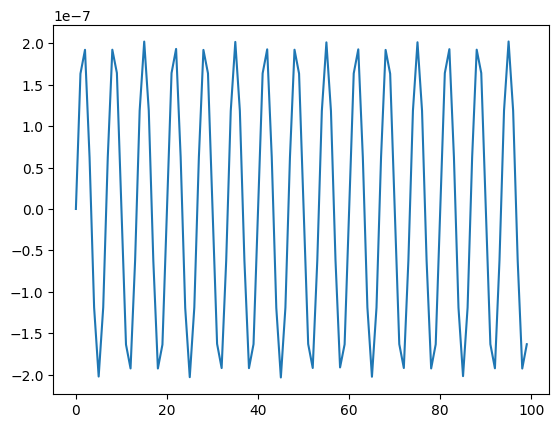

In [106]:
n=np.array(B)
t = np.arange(100)
n=n[0:100]*np.sin(.15*2*np.pi*t)
plt.plot(t,n)

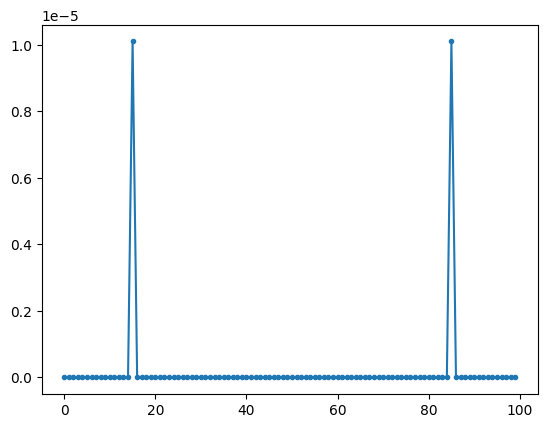

In [107]:
S = np.fft.fft(n)
S_mag = np.abs(S)
plt.plot(t,S_mag,'.-')

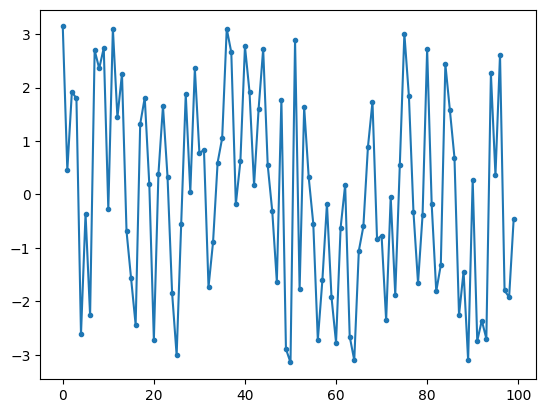

In [108]:
S_phase = np.angle(S)
plt.plot(t,S_phase,'.-')

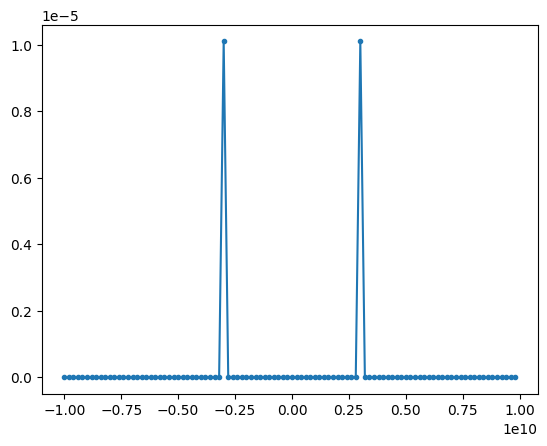

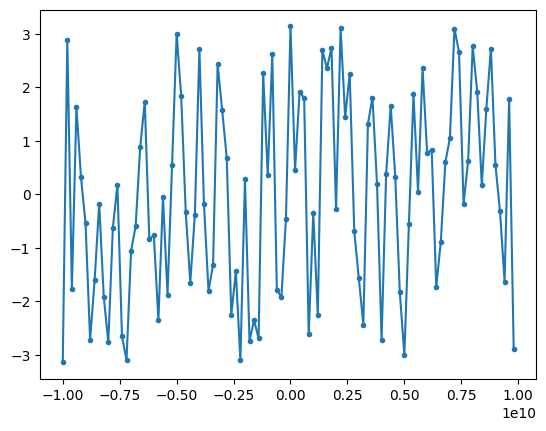

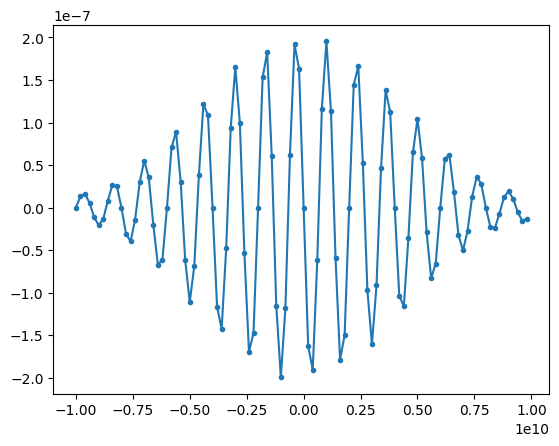

In [109]:
Fs = 20000000000 # Hz
N = len(n)
S = np.fft.fftshift(np.fft.fft(n))
sn = n * np.hamming(N)
S_mag = np.abs(S)
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.figure(0)
plt.plot(f, S_mag,'.-')
plt.figure(1)
plt.plot(f, S_phase,'.-')
plt.figure(3)
plt.plot(f, sn,'.-')
plt.show()

(array([[1.33243617e-08, 1.32754821e-08, 1.29609014e-08, ...,
         1.22776158e-08, 1.03896114e-08, 1.00481293e-08],
        [6.85651413e-09, 6.86984538e-09, 6.61966814e-09, ...,
         6.60162514e-09, 5.38645032e-09, 5.22130035e-09],
        [2.95181441e-13, 5.51050696e-13, 2.91111021e-14, ...,
         2.89316477e-11, 6.39673185e-13, 7.35233569e-13],
        ...,
        [2.45881082e-16, 2.88304069e-16, 7.96434455e-16, ...,
         6.94453955e-16, 5.62405780e-16, 1.60406888e-16],
        [7.93969075e-17, 7.16529566e-16, 7.27898646e-16, ...,
         6.54782564e-16, 4.42594001e-16, 1.54477319e-16],
        [8.77241559e-17, 4.78748355e-16, 2.85099084e-16, ...,
         6.86585611e-17, 9.29116888e-18, 4.51552782e-16]]),
 array([0.00000000e+00, 2.02061022e-06, 4.04122045e-06, 6.06183067e-06,
        8.08244090e-06, 1.01030511e-05, 1.21236613e-05, 1.41442716e-05,
        1.61648818e-05, 1.81854920e-05, 2.02061022e-05, 2.22267125e-05,
        2.42473227e-05, 2.62679329e-05, 2.8288543

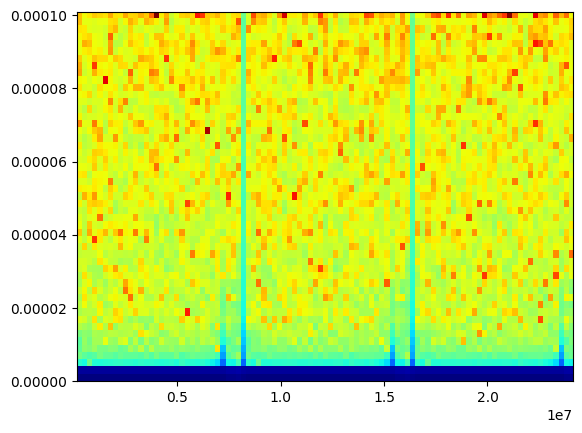

In [110]:
plt.specgram(np.array(B), NFFT=100, noverlap=50, Fs=1/len(B), cmap='jet_r')